<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Згрузка-инструментов" data-toc-modified-id="Згрузка-инструментов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Згрузка инструментов</a></span></li><li><span><a href="#Обзор-обучающего-датасета" data-toc-modified-id="Обзор-обучающего-датасета-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор обучающего датасета</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#реализация-конвеера" data-toc-modified-id="реализация-конвеера-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>реализация конвеера</a></span></li></ul></div>

# Згрузка инструментов


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import imblearn
from sklearn import metrics 
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve, f1_score, precision_score, r2_score)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from scipy.stats import mannwhitneyu
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
%config InlineBackend.figure_format = 'png'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Обзор обучающего датасета

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
data = df['Class'].value_counts()
data

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Количество фрод операций')

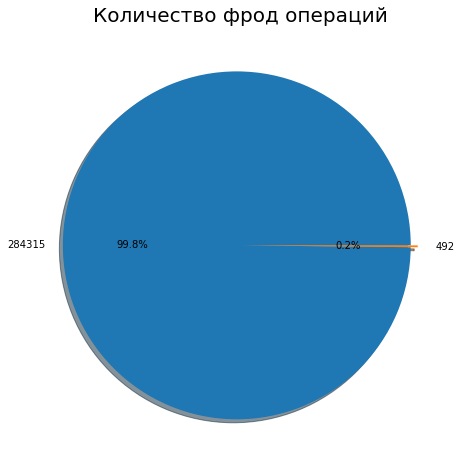

In [8]:
pie, ax = plt.subplots(figsize=[10,8])
labels = data
plt.pie(x=data, explode=[0.02]*2, autopct='%1.1f%%', labels=labels, shadow=True)
plt.title('Количество фрод операций', fontsize=20)

Класс очень не сбалансированный

In [9]:
X = df.drop(['Time', 'Class'], axis = 1)
y = df['Class']

In [10]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [11]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, test_size= 0.25)

In [13]:
def is_balanced_splitting(y):
    counts = np.bincount(y)
    return counts[1] / (sum(counts))

In [14]:
print('Percentage of FRAUD instances in Training Set : {}'.format(is_balanced_splitting(y_train) * 100))
print('Percentage of FRAUD instances in Testing Set : {}'.format(is_balanced_splitting(y_test) * 100))

Percentage of FRAUD instances in Training Set : 0.16806722689075632
Percentage of FRAUD instances in Testing Set : 0.18679250582848797


In [15]:
def oversampling(X_train, y_train):
    oversample = SMOTE(random_state = 42, sampling_strategy = 0.4)
    X, y = oversample.fit_resample(X_train, y_train)
    counter = Counter(y)
    print(counter)
    return X, y

In [16]:
X_train, y_train = oversampling(X_train, y_train)

Counter({0: 213246, 1: 85298})


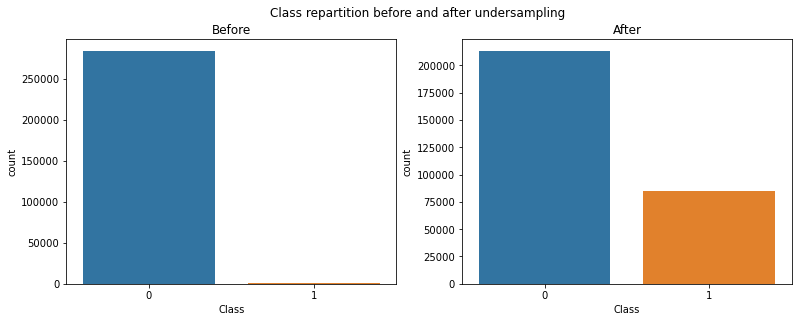

In [17]:
after = pd.DataFrame(y_train, columns = ['Class'])
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=after, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")
plt.show()

# Logistic Regression

In [18]:
log_model = LogisticRegression(random_state = 2)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [19]:
log_y_pred = log_model.predict(X_test)

In [20]:
log_cm = metrics.confusion_matrix(y_test, log_y_pred)
print(log_cm)

[[70266   803]
 [   14   119]]


In [21]:
log_classification_report = metrics.classification_report(y_test, log_y_pred)
print('Log Classification Report',log_classification_report)


Log Classification Report               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71069
           1       0.13      0.89      0.23       133

    accuracy                           0.99     71202
   macro avg       0.56      0.94      0.61     71202
weighted avg       1.00      0.99      0.99     71202



In [22]:
print("Accuracy Logit:",metrics.accuracy_score(y_test, log_y_pred)*100)
print("Precision Logit:",metrics.precision_score(y_test, log_y_pred)*100)
print("Recall Logit:",metrics.recall_score(y_test, log_y_pred)*100)
print("F1 Score Logit:",metrics.f1_score(y_test, log_y_pred)*100)

Accuracy Logit: 98.85256032133928
Precision Logit: 12.906724511930587
Recall Logit: 89.47368421052632
F1 Score Logit: 22.55924170616114


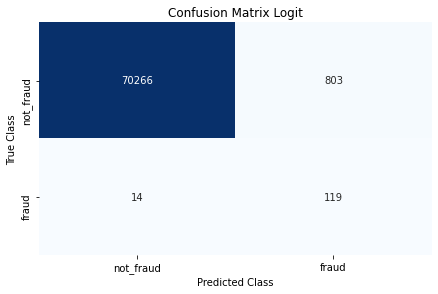

In [23]:
matrix_logit = metrics.confusion_matrix(y_test, log_y_pred)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [24]:
y_pred_logit_proba = log_model.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
log_auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", log_auc_logit*100)

AUC Logistic Regression : 97.07293356863715


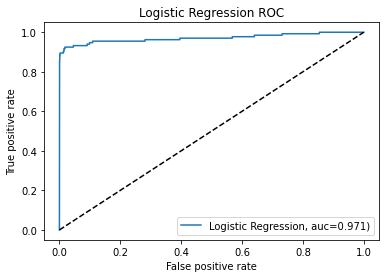

In [25]:
plt.plot(fpr_logit,tpr_logit, label="Logistic Regression, auc={:.3f})".format(log_auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC')
plt.legend(loc=4)
plt.show()

In [26]:
under_sampler = RandomUnderSampler(sampling_strategy = .50)

In [27]:
X_under, y_under = under_sampler.fit_resample(X,y)

In [28]:
from pandas import DataFrame
test = pd.DataFrame(y_under, columns = ['Class'])

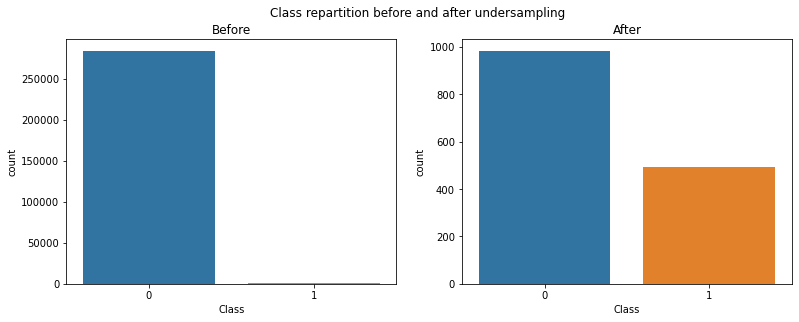

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_under, test, random_state=25, test_size= 0.25)

In [31]:
sc_x = StandardScaler()

In [32]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [33]:
log_model = LogisticRegression(random_state = 2)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [34]:
log_y_pred = log_model.predict(X_test)

In [35]:
log_cm = metrics.confusion_matrix(y_test, log_y_pred)
print(log_cm)

[[239   4]
 [ 16 110]]


In [36]:
log_classification_report = metrics.classification_report(y_test, log_y_pred)
print('Log Classification Report',log_classification_report)

Log Classification Report               precision    recall  f1-score   support

           0       0.94      0.98      0.96       243
           1       0.96      0.87      0.92       126

    accuracy                           0.95       369
   macro avg       0.95      0.93      0.94       369
weighted avg       0.95      0.95      0.95       369



In [37]:
print("Accuracy Logit:",metrics.accuracy_score(y_test, log_y_pred)*100)
print("Precision Logit:",metrics.precision_score(y_test, log_y_pred)*100)
print("Recall Logit:",metrics.recall_score(y_test, log_y_pred)*100)
print("F1 Score Logit:",metrics.f1_score(y_test, log_y_pred)*100)

Accuracy Logit: 94.579945799458
Precision Logit: 96.49122807017544
Recall Logit: 87.3015873015873
F1 Score Logit: 91.66666666666667


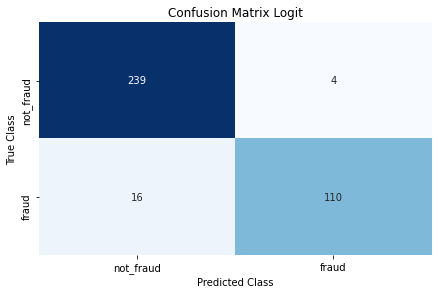

In [38]:
matrix_logit = metrics.confusion_matrix(y_test, log_y_pred)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show() 

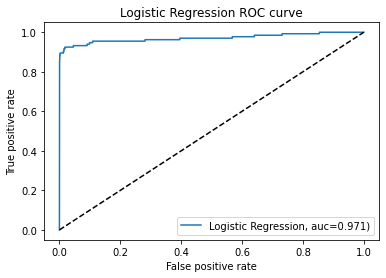

In [39]:
plt.plot(fpr_logit,tpr_logit, label="Logistic Regression, auc={:.3f})".format(log_auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

# реализация конвеера

In [43]:
class DataPreprocessing:
    def __init__(self):
        self.X = df.drop(['Time', 'Class'], axis = 1)
        self.y = df['Class']
        
        
    def transform_over(self, X):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, random_state=25, test_size= 0.2)    
        oversample = SMOTE(random_state = 42, sampling_strategy = 0.4)
        self.X, self.y = oversample.fit_resample(self.X_train, self.y_train)
        counter = Counter(self.y)
        print(counter)
        sns.set(style="whitegrid")
        labels = ['Not Fraud', 'Fraud']
        sizes = self.y.value_counts()

        colors = ["lightblue","red"]
 
 
        plt.figure(figsize=(7,7))
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)

        plt.title('Frauds in the dataset')
        plt.legend()
        plt.show()
        
        sc_x = StandardScaler()
        self.X_train = sc_x.fit_transform(self.X_train)
        self.X_test = sc_x.fit_transform(self.X_test)
        log_model = LogisticRegression(random_state = 2)
        log_model.fit(self.X_train, self.y_train)
        log_y_pred = log_model.predict(self.X_test)
        
        log_cm = metrics.confusion_matrix(self.y_test, log_y_pred)
        log_classification_report = metrics.classification_report(self.y_test, log_y_pred)
        print('Log Classification Report',log_classification_report)
        print("Accuracy Logit:",metrics.accuracy_score(self.y_test, log_y_pred)*100)
        print("Precision Logit:",metrics.precision_score(self.y_test, log_y_pred)*100)
        print("Recall Logit:",metrics.recall_score(self.y_test, log_y_pred)*100)
        print("F1 Score Logit:",metrics.f1_score(self.y_test, log_y_pred)*100)
        
        matrix_logit = metrics.confusion_matrix(self.y_test, log_y_pred)
        cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
        sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
        plt.title("Confusion Matrix Logit"), plt.tight_layout()
        plt.ylabel("True Class"), plt.xlabel("Predicted Class")
        plt.show()   
        
        plt.plot(fpr_logit,tpr_logit, label="Logistic Regression, auc={:.3f})".format(log_auc_logit))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('Logistic Regression ROC curve')
        plt.legend(loc=4)
        plt.show()        
        
        return 
    
    def transform_under(self, X):
        under_sampler = RandomUnderSampler(sampling_strategy = .50)
        self.X_under, self.y_under = under_sampler.fit_resample(self.X, self.y)
        self.test = pd.DataFrame(self.y_under, columns = ['Class'])
        fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
        sns.countplot(x="Class", data=df, ax=axs[0])
        sns.countplot(x="Class", data=test, ax=axs[1])

        fig.suptitle("Class repartition before and after undersampling")
        a1=fig.axes[0]
        a1.set_title("Before")
        a2=fig.axes[1]
        a2.set_title("After")
        plt.show()
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X_under, self.test, random_state=25, test_size= 0.25)
        sc_x = StandardScaler()
        self.X_train = sc_x.fit_transform(self.X_train)
        self.X_test = sc_x.fit_transform(self.X_test)
        
        log_model = LogisticRegression(random_state = 2)
        log_model.fit(self.X_train, self.y_train)
        log_y_pred = log_model.predict(self.X_test)
        log_cm = metrics.confusion_matrix(self.y_test, log_y_pred)
        
        log_classification_report = metrics.classification_report(self.y_test, log_y_pred)
        print('Log Classification Report',log_classification_report)
        print("Accuracy Logit:",metrics.accuracy_score(self.y_test, log_y_pred)*100)
        print("Precision Logit:",metrics.precision_score(self.y_test, log_y_pred)*100)
        print("Recall Logit:",metrics.recall_score(self.y_test, log_y_pred)*100)
        print("F1 Score Logit:",metrics.f1_score(self.y_test, log_y_pred)*100)
        
        matrix_logit = metrics.confusion_matrix(self.y_test, log_y_pred)
        cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
        sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
        plt.title("Confusion Matrix Logit"), plt.tight_layout()
        plt.ylabel("True Class"), plt.xlabel("Predicted Class")
        plt.show()   
        
        plt.plot(fpr_logit,tpr_logit, label="Logistic Regression, auc={:.3f})".format(log_auc_logit))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('Logistic Regression ROC curve')
        plt.legend(loc=4)
        plt.show()

Counter({0: 227465, 1: 90986})


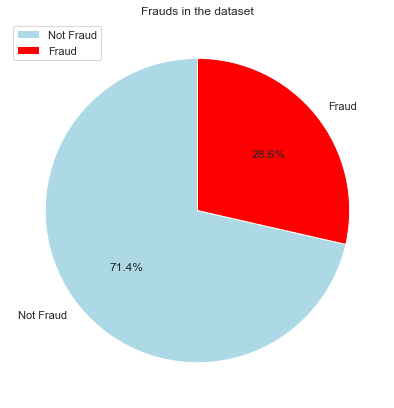

Log Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.93      0.62      0.75       112

    accuracy                           1.00     56962
   macro avg       0.97      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Logit: 99.91748885221726
Precision Logit: 93.33333333333333
Recall Logit: 62.5
F1 Score Logit: 74.8663101604278


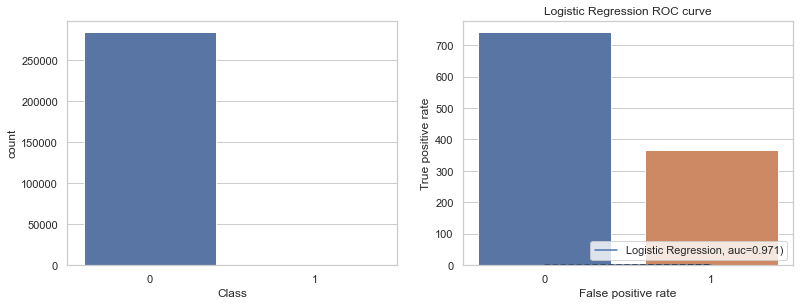

In [46]:
process = DataPreprocessing()
a = process.transform_over(df)

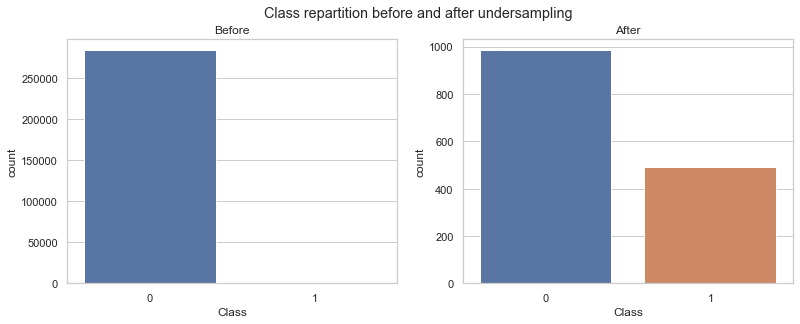

Log Classification Report               precision    recall  f1-score   support

           0       0.93      0.99      0.96       243
           1       0.97      0.86      0.91       126

    accuracy                           0.94       369
   macro avg       0.95      0.92      0.93       369
weighted avg       0.94      0.94      0.94       369

Accuracy Logit: 94.3089430894309
Precision Logit: 97.2972972972973
Recall Logit: 85.71428571428571
F1 Score Logit: 91.13924050632912


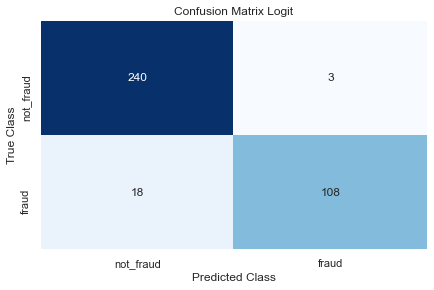

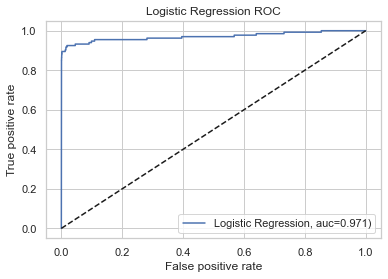

In [45]:
process = DataPreprocessing()
b = process.transform_under(df)


